In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
'''
age: age
sex: sex
cp: chest pain type (4 values)
trtbps: resting blood pressure
chol: serum cholestoral in mg/dl
fbs: fasting blood sugar > 120 mg/dl
restecg: resting electrocardiographic results (values 0,1,2)
thalachh: maximum heart rate achieved
exng: exercise induced angina
oldpeak: oldpeak = ST depression induced by exercise relative to rest
slp: the slope of the peak exercise ST segment
caa: number of major vessels (0-3) colored by flourosopy
thall: thal: 3 = normal; 6 = fixed defect; 7 = reversable defect
'''

heart = pd.read_csv('https://raw.githubusercontent.com/DanielBrooks253/Kaggle/main/Heart_Attack_Analysis/heart.csv')
heart.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [4]:
heart.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


<BarContainer object of 2 artists>

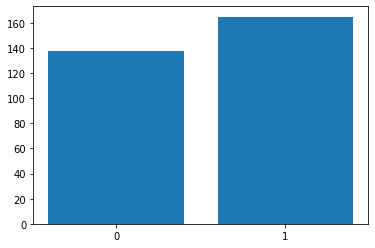

In [5]:
counts = {"0": len(heart[heart['output'] == 0]), 
          "1": len(heart[heart['output'] == 1])}

plt.bar(counts.keys(), counts.values()) # Pretty even split

# Categorical Variables (SEX, CP, FBS, RESTECG, EXANG, SLOPE, CA, THAL)

In [6]:
'''
1. There are more males than females
2. 75% of females have heart disease, 45% of males have heart disease.
3. Potentially a good variable
'''
pd.crosstab(heart['sex'], heart['output'])

output,0,1
sex,,
0,24,72
1,114,93


In [7]:
'''
1. 27% poeple with heart diseace with no chest pain; 41% heart disease with minor chest pain; 79% heart disease with major cheat pain; 70% chest pain wiht sever chest pain.
2. Group together chest pain and no chest pain
3. Does not seem like a good predictor
'''
pd.crosstab(heart['cp'], heart['output'])

output,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


In [8]:
'''
1. Not a lot of people have a resting heart rate above 120 mg/dl
2. 55% of people above 120 mg/dl have hear disease; 51% do not 
3. Does not seem like a good predictor
'''
pd.crosstab(heart['fbs'], heart['output'])

output,0,1
fbs,,
0,116,142
1,22,23


In [9]:
'''
1. 46% have heart disease with restecg 0, 63% have heart disease with with restecg 1; 25% have heart disease with with restecg 2.
2. Potentially a good variable
'''
pd.crosstab(heart['restecg'], heart['output'])

output,0,1
restecg,,
0,79,68
1,56,96
2,3,1


In [10]:
'''
1. 70% of people with exng 0 have heart disease; 23% of people with exng 1 have heart disease
2. Potentially a good variable
'''
pd.crosstab(heart['exng'], heart['output'])

output,0,1
exng,,
0,62,142
1,76,23


In [11]:
'''
1. 43% or people wiht slope of 0 have heart disease; 35% of people with slope 1 have heart disease; 75% of people with slope of 2 have heart disease
2. Potentially a good variable
'''
pd.crosstab(heart['slp'], heart['output'])

output,0,1
slp,,
0,12,9
1,91,49
2,35,107


In [12]:
'''
1. 74% caa 0 have heart disease; 32% caa of 1 have heart disease; 18% caa of 2 have heart disease; 15% caa 3 have heart disease; 80% caa of 4 have heart disease
2. Potentially a good variable
'''
pd.crosstab(heart['caa'], heart['output'])

output,0,1
caa,,
0,45,130
1,44,21
2,31,7
3,17,3
4,1,4


In [13]:
'''
1. 50% thall 0 have heart disease; 33% thall 1 have heart disease; 75% thall 2 have heart disease; 24% thall of 3 have heart disease
2. Potentially a good variable
'''
pd.crosstab(heart['thall'], heart['output'])

output,0,1
thall,,
0,1,1
1,12,6
2,36,130
3,89,28


# Continuous Variables (AGE, TRESTBPS, CHOL, THALACH, OLDPEAK)

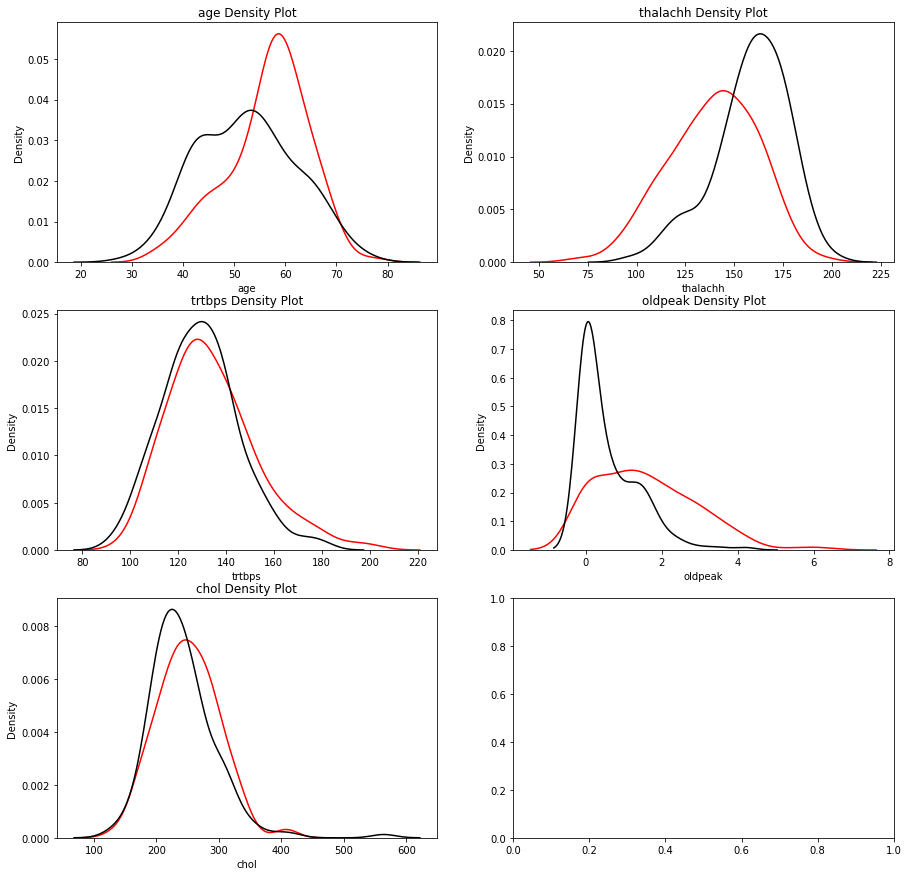

In [14]:
'''
1: trtbps appears to have very similar distributions for both hear disease categories (Not good predictor)
2: chol appears to have very similar distributions for both heart disease categories (Not good predictor)
3: old peak appears to be the best out of the bunch.
'''

cols = ["age", "trtbps", 'chol', 'thalachh', 'oldpeak']
fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(15,15))
count = 0

for i in range(2):
    for j in range(3):
        for out, colors in zip([0,1], ['red', 'black']): # Heart Disease (1): Black, No Heart Disease (0): Red
            if count <= 4:
                subset = heart[heart['output'] == out]

                sns.distplot(subset[cols[count]],
                         hist=False,
                         kde=True,
                         label=out,
                         kde_kws={'color': colors},
                         ax = axs[j,i])
            else:
                break 
            axs[j,i].set_title('{0} Density Plot'.format(cols[count]))
        count = count + 1


In [15]:
# variables to move forward with: Age, thalachh, oldpeak, sex, cp, exng, slp, caa, thall
keep_cols = heart[['age', 'thalachh', 'oldpeak', 'sex', 'cp', 'exng', 'slp', 'caa', 'thall', 'output']]

In [16]:
keep_cols

,age,thalachh,oldpeak,sex,cp,exng,slp,caa,thall,output
0,63,150,2.3,1,3,0,0,0,1,1
1,37,187,3.5,1,2,0,0,0,2,1
2,41,172,1.4,0,1,0,2,0,2,1
3,56,178,0.8,1,1,0,2,0,2,1
4,57,163,0.6,0,0,1,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...
298,57,123,0.2,0,0,1,1,0,3,0
299,45,132,1.2,1,3,0,1,0,3,0
300,68,141,3.4,1,0,0,1,2,3,0
301,57,115,1.2,1,0,1,1,1,3,0
